In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [3]:
# Load the HR data 

hrdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Naive Bayes\HR_comma_sep.csv", header=0)

# Copy to back-up file

hrdata_bk = hrdata.copy()

# Display first 5 records

hrdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Display the dataset information

hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hrdata.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Display dataset columns

hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Create cols1 for crating a dummy variables & Cols 2 for scaling the data normilization

cols1 = ['Department', 'salary']
cols2 = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

In [9]:
# Create dummy variable for all cols1 columns

hrdata = pd.get_dummies(hrdata, columns=cols1)
hrdata.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.80,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2.00,5.00,7.00,5.00,2.00
average_montly_hours,157.00,262.00,272.00,223.00,159.00
time_spend_company,3.00,6.00,4.00,5.00,3.00
Work_accident,0.00,0.00,0.00,0.00,0.00
left,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,0.00,0.00,0.00,0.00,0.00
Department_IT,0.00,0.00,0.00,0.00,0.00
Department_RandD,0.00,0.00,0.00,0.00,0.00


In [10]:
# Identify the independent and Target variables

IndepVar = []
for col in hrdata.columns:
    if col != 'left':
        IndepVar.append(col)

TargetVar = 'left'

x = hrdata[IndepVar]
y = hrdata[TargetVar]

In [11]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((10499, 20), (4500, 20), (10499,), (4500,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

In [13]:
# Load the result dataset

CSResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Naive Bayes\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Compare GaussianNB, BernoulliNB & MultinomialNB (Naive Bayes Algorithms)

Model Name:  GaussianNB()
Confusion matrix : 
 [[ 902  170]
 [1404 2024]]
Outcome values : 
 902 170 1404 2024
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.84      0.53      1072
           0       0.92      0.59      0.72      3428

    accuracy                           0.65      4500
   macro avg       0.66      0.72      0.63      4500
weighted avg       0.80      0.65      0.68      4500

Accuracy : 65.0 %
Precision : 39.1 %
Recall : 84.1 %
F1 Score : 0.534
Specificity or True Negative Rate : 59.0 %
Balanced Accuracy : 71.6 %
MCC : 0.368
roc_auc_score: 0.716


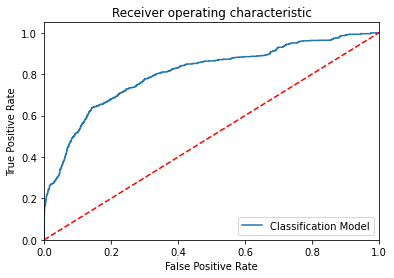

-----------------------------------------------------------------------------------------------------
Model Name:  BernoulliNB(binarize=0.25)
Confusion matrix : 
 [[ 250  822]
 [ 240 3188]]
Outcome values : 
 250 822 240 3188
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.23      0.32      1072
           0       0.80      0.93      0.86      3428

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500

Accuracy : 76.4 %
Precision : 51.0 %
Recall : 23.3 %
F1 Score : 0.32
Specificity or True Negative Rate : 93.0 %
Balanced Accuracy : 58.2 %
MCC : 0.223
roc_auc_score: 0.582


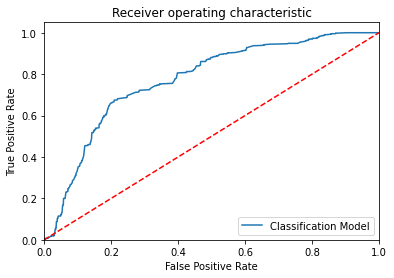

-----------------------------------------------------------------------------------------------------
Model Name:  MultinomialNB()
Confusion matrix : 
 [[   0 1072]
 [   0 3428]]
Outcome values : 
 0 1072 0 3428
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1072
           0       0.76      1.00      0.86      3428

    accuracy                           0.76      4500
   macro avg       0.38      0.50      0.43      4500
weighted avg       0.58      0.76      0.66      4500

Accuracy : 76.2 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


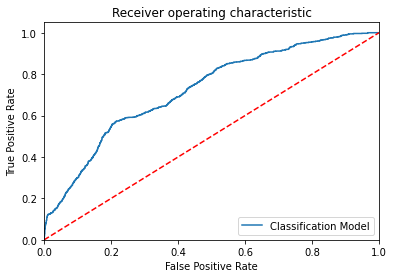

-----------------------------------------------------------------------------------------------------


In [14]:
# Build the Calssification models and compare the results

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Create objects of classification algorithm with default hyper-parameters

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

modelBNB = BernoulliNB(binarize=0.25)

modelMNB = MultinomialNB()

# Evalution matrix for all the algorithms

MM = [modelGNB, modelBNB, modelMNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [15]:
# Results with comparing the all the algorithms 

CSResults.to_csv("C://Users//Admin//Downloads//Raju Sir DLS//Naive Bayes//CSResults - 02.csv")

CSResults.head(20)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,GaussianNB(),0.65,0.391,0.841,0.534,0.59,0.368,0.715925,0.716
1,BernoulliNB(binarize=0.25),0.764,0.51,0.233,0.32,0.93,0.223,0.581599,0.582
2,MultinomialNB(),0.762,NaN,0.0,0.0,1.0,NaN,0.5,0.5
